# Implementacja optymalizacji gradientowej

/home/lpo/.sage/local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


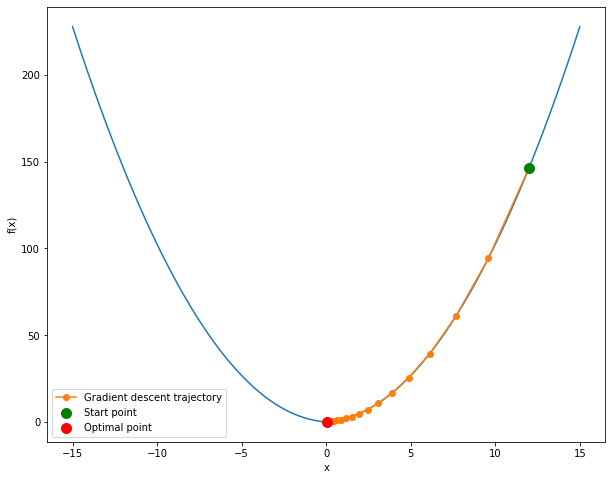

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import mpl_toolkits

# Gradient descent function
def gradient_descent(grad_f, theta_init, learning_rate, iterations):
    theta = theta_init
    trajectory = [theta]
    for i in range(iterations):
        theta -= learning_rate * grad_f(theta)
        trajectory.append(theta)
    return theta, trajectory

f = lambda x: np.log(np.abs(x) + 1) + x * x
grad_f = lambda x: (1 / (x + 1)) + 2 * x

# Parameters for gradient descent
theta_init = 12.0
learning_rate = 0.1
iterations = 16

# Perform gradient descent
optimal_theta, trajectory = gradient_descent(grad_f, theta_init, learning_rate, iterations)

x = np.linspace(-15, 15, 400)
y = f(x)

plt.figure(figsize=(10, 8))
plt.plot(x, y)
plt.plot(trajectory, [f(t) for t in trajectory], marker='o', label='Gradient descent trajectory')
plt.scatter(theta_init, f(theta_init), 100, color='green', label='Start point', zorder=2)
plt.scatter(optimal_theta, f(optimal_theta), 100, color='red', label='Optimal point', zorder=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Budowa modelu
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dense(1)  # Warstwa wyjściowa
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

f = lambda x, y, z: 3 * x + 2 * y - 4 * z

# Dane treningowe
X_train = np.random.rand(200, 3)
y_train =  np.array([[f(x, y, z)] for x, y, z in X_train])

# Trening modelu
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Generowanie zbioru testowego
X_test = np.random.rand(20, 3)  # 20 próbek testowych
y_test = np.array([f(x, y, z) for x, y, z in X_test])

# Ewaluacja modelu na zbiorze testowym
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Loss na zbiorze testowym: {loss}")
print(f"MAE na zbiorze testowym: {mae}")

# Prognozowanie dla nowych danych
new_data = np.random.rand(5, 3)  # 5 nowych próbek
predictions = model.predict(new_data)

# Wyświetlenie wyników prognozowania
print("Prognozowane wartości dla nowych danych:")
for i, prediction in enumerate(predictions):
    print("Przykład {}: x = {:.4f}, y = {:.4f}, z = {:.4f}, f(x, y, z) = {:.4f}, Predykcja: {:.4f}".format(i + 1, *new_data[i], f(*new_data[i]), prediction[0]))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4507 - mae: 1.2811  
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3043 - mae: 1.2276 
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1024 - mae: 1.2136 
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0559 - mae: 1.1716 
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1022 - mae: 1.2166 
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7781 - mae: 1.1255 
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6485 - mae: 1.0781 
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5844 - mae: 1.0447 
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5373 - mae: 1.0358 
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5279 - mae: 1.0253 
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3364 - mae: 0.9773 
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4005 - mae: 0.9941 
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.3453 - loss: 1.7794 - val_accuracy: 0.5076 - val_loss: 1.3446
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5497 - loss: 1.2608 - val_accuracy: 0.5895 - val_loss: 1.1530
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6194 - loss: 1.0862 - val_accuracy: 0.6242 - val_loss: 1.0647
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6560 - loss: 0.9781 - val_accuracy: 0.6613 - val_loss: 0.9736
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6869 - loss: 0.8931 - val_accuracy: 0.6702 - val_loss: 0.9491
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7063 - loss: 0.8394 - val_accuracy: 0.6753 - val_loss: 0.9432
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7275 - loss: 0.7856 - val_accuracy: 0.6847 - val_loss: 0.9090
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7344 -

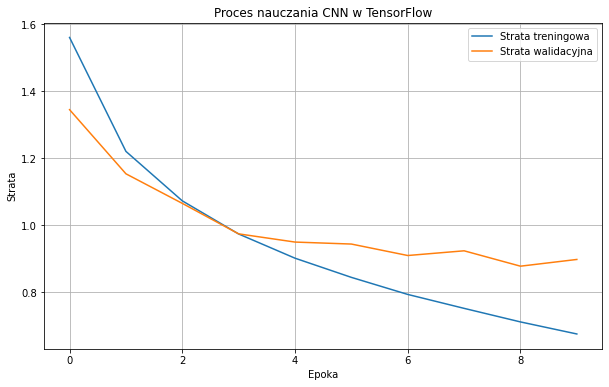

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6952 - loss: 0.8975
Dokładność modelu na zbiorze testowym: 0.69%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Prognozowane etykiety dla przykładowych danych:
Przykład 1: Prawidłowa etykieta: 3 Prognozowana etykieta: 3
Przykład 2: Prawidłowa etykieta: 8 Prognozowana etykieta: 8
Przykład 3: Prawidłowa etykieta: 8 Prognozowana etykieta: 8
Przykład 4: Prawidłowa etykieta: 0 Prognozowana etykieta: 0
Przykład 5: Prawidłowa etykieta: 6 Prognozowana etykieta: 4


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

# Przygotowanie danych
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Przekształcanie danych
X_train = X_train.reshape(-1, 32, 32, 3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32, 32, 3).astype('float32') / 255.0

# One-hot encoding etykiet
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Budowa modelu
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='leaky_relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
epochs = 10
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Wizualizacja procesu nauczania
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.title('Proces nauczania CNN w TensorFlow')
plt.legend()
plt.grid()
plt.show()

# Testowanie modelu
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Dokładność modelu na zbiorze testowym: {accuracy:.2f}%")

# Prognozowanie dla nowych danych
new_data = X_test[:5]  # Przykładowe dane testowe
predictions = model.predict(new_data)

# Wyświetlenie wyników prognozowania
print("Prognozowane etykiety dla przykładowych danych:")
for i, prediction in enumerate(predictions):
    print(f"Przykład {i + 1}: Prawidłowa etykieta: {y_test[i].tolist().index(1.0)} Prognozowana etykieta: {tf.argmax(prediction).numpy()}")